# Linear Regression



# Introduction

 _The objective of this project is to get familiar with Linear Regression. Linear Regression is the most common used Supervised Learning algorithm. It helps in making easy predictions and can be used to predict the value of target variables given one or more features._ 

_For this, I will be implementing Least Mean Square and Least Squares and then use these models to predict values in the bike sharing dataset. To accomplish this, I have created two python classes LinearRegress and LMS. After implementation, I have divided my data set into train and test datasets and then perform LS and LMS on training dataset and test the prediction on the test dataset and calculate the root mean square error._ 

# Data



## Dataset Description
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular place and return back at another place. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. <br>
**It consists of the following attributes:**
1. instant: record index
2. dteday : date
3. season : season (1:spring, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. holiday : weather day is holiday or not
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
9. weathersit :<br>
    1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
10. temp : Normalized temperature in Celsius. 
11. atemp: Normalized feeling temperature in Celsius. 
12. hum: Normalized humidity.
13. windspeed: Normalized wind speed.
14. casual: count of non-registered users
15. registered: count of registered users
16. cnt: count of total rental bikes (including both casual and registered)

## Source of data
https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Sample of first few rows

In [3]:
data = pd.read_csv(r'Bike Sharing System.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Variable Data Type

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**_Checking the type of each variable and if there are any missing values in the dataset. Since all the columns have 731 entries, we will continue with further stages of pre-processing._**

In [5]:
categoryVariableList = ["hr", "weekday", "mnth", "season", "holiday", "workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")

In [6]:
data.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

**As a part of pre-processing, columns such as hour, week day, month, season, weather, holiday and working day should be of 'category' data type but the current data type is 'int' for those columns. Coercing the datatype of  "hr", "weekday", "mnth", "season", "weathersit", "holiday", "workingday" to category**

In [7]:
data['season'].replace({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'}, inplace=True)
data['mnth'].replace({1 : "January",2 : "February",3 : "March",4 : "April", 5 : "May", 6 : "June", 7 : "July",8 : "August",9 : "September",10 : "October",11 : "November",12 : "December"}, inplace=True)

*Replacing number with characters so that graphs look more visually appealing and user readable.*

### Analysing the outliers

[Text(0,0.5,'Count'),
 Text(0.5,0,'Working Day'),
 Text(0.5,1,'Box Plot On Count Across Working Day')]

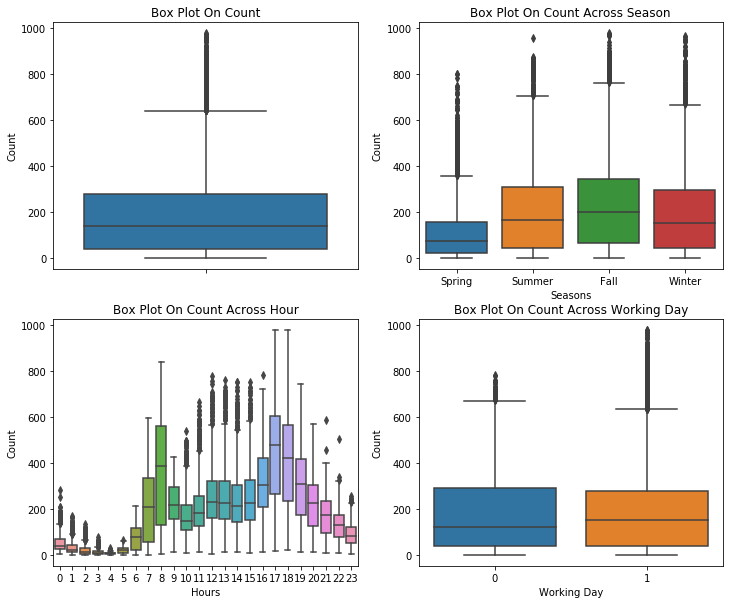

In [8]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Seasons', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hours', ylabel='Count',title="Box Plot On Count Across Hour")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

_The "cnt" variable contains lot of outlier data points which skews the distribution towards right.But in addition to that, following inferences can also been made from boxplots._

* Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.
* The boxplot on count across hour shows that the median value are relatively higher at 8AM - 9AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
* Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day" which is visible from the figure

### Bar Plot

Text(0,0.5,'Count')

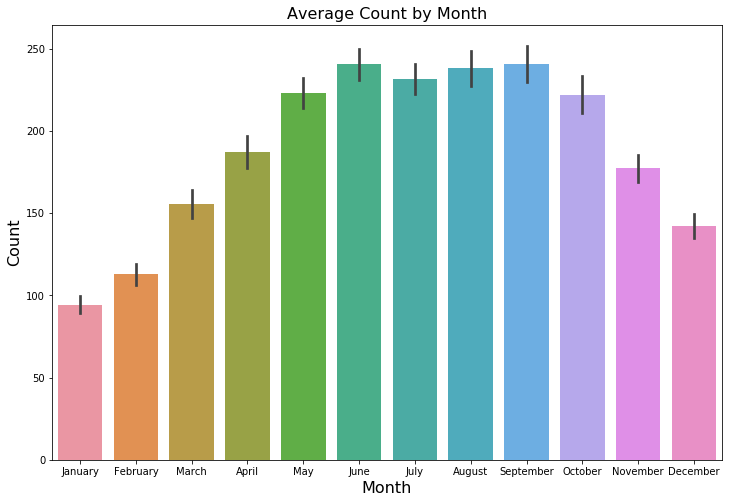

In [9]:
plt.subplots(figsize=(12,8))
sortmonth = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sns.barplot(data=data,x="mnth",y="cnt", order=sortmonth)
plt.title("Average Count by Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Count", fontsize=16)

*From the above barplot we can infer that people like to rent bike during summer season because the weather is perfect for riding bikes. Hence, June, July, August and September have relatively higher demand for the bike.* 

### Point Plot

Text(0,0.5,'Count')

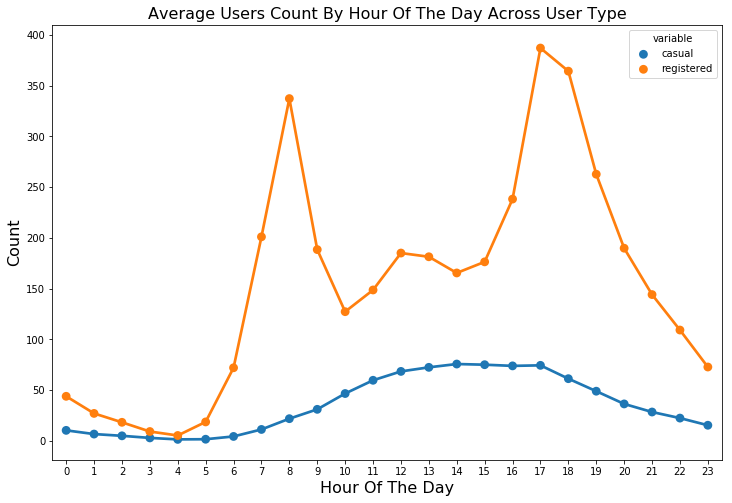

In [10]:
plt.subplots(figsize=(12,8))
hourTransformed = pd.melt(data[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True)
plt.title("Average Users Count By Hour Of The Day Across User Type", fontsize=16)
plt.xlabel("Hour Of The Day", fontsize=16)
plt.ylabel("Count", fontsize=16)

*From the above point plot we can infer that user count around 7am - 8am and 5pm  - 6pm is contributed more by registered users. As mentioned earlier this can be attributed to regular school and office commuters.*

# Method


# Linear Model

Linear model can be defined as a Euclidean dot product between two vectors: 


$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where $w$ is a weight vector and $x$ is an input vector. 
When it is a one dimensional vector, it represents a straight line, so it is called *linear*. 

Assume that we have $N$ data observations, $x_i$ and target outputs, $t_i$, for $i = 1, \cdots, N$.
The simpliest model that we can think of is constant model, $f(x) = c$, where $c$ is any scalar. 
In this case, we have the zero weights in the linear model. 

The linearity in the parameter $x$ make the optimization based on deravatives to solvable analytically. 
The model limits the complexity so its representation is also limited. However, it can prevent possible overfitting with the simple modeling, especially when you have sparsely sampled data.

## Least Squares

The parameter that gives best fit will be

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

Since the error funciton is quadratic, the problem can be analytically solved by simply setting derivative with respect to $w$ to zero. 
For this, let us prepare data in matrix. 
The target values are collected in matrix $T$, and the input samples are in matrix $X$.

The error function is quadratic. Therefore, to get we can get the parameters giving minimum by taking the derivating of the function and setting it to 0. This derivation gives us following relation.

$$
\begin{align}
 2 X^\top X w - 2 X^\top T  &= 0\\
\\
X^\top X w &= X^\top T\\
\\
w &= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$


## Least Mean Square
The Least Square model uses entire dataset at one for training the model and finding the best weights. Even though it does well but it is often computationally costly, especially when we have large number of features and a very large training dataset.

In case of large dataset, *sequential* or *online* learning is preferred. In this method, the records of the dataset are fed to the training function one-by-one, which in turn update weights. Using the updated parameters, it makes a new estimation and repeat these steps. 

Initially the weight vector w is assigned with random values and it is updated as follows until convergence. 
When $k$ represents the steps for the repetition,

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This method is also called *stochastic gradient descent* or *sequential gradient descent*. 

For the $k$'th sample $x_k$, the gradient for the sum-of-squares error is

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial w^{(k)}} &= \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 \\
        &= 2 \Big( f(x_k; w^{(k)}) - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( f(x_k; w^{(k)}) - t_k \Big) \\
        &= 2 \Big( {w^{(k)}}^\top x_k - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( {w^{(k)}}^\top x_k - t_k \Big) \\
        &= 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$


### Super Classs Definition

In [11]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
   
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [12]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
                
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.lstsq(X.T @ X, X.T @ T)[0] 
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w

### Implementation
_Implementation of this model is done in the LinearRegress class. The method "train" takes a feature matrix and reference values of the training set and apply the above relation to generate weights._ _The weights are stored in array "w"._
_The "use" method can be used to execute the trained model on the test dataset. It returns an array of projected results by performing dot product of weight vector (w) with features (X) of test dataset_

### Least Mean Squares

In [13]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.insert(x, 0, 1).reshape(-1, 1)
        if self.w is None:
            self.w = np.zeros((x.shape[0], 1))
        temp = self.w.T @ x - t
        temp1 = self.alpha * temp * x
        self.w = np.subtract(self.w, temp1)
        
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        t = self.w.T @ X.T
        return t.T       

#### Implementation
For implementation of Least Mean Square model, in the LMS class two methods are defined, "train" and "train_step".
* **train_step**: Train_step method takes a sample one by one from the training dataset and adjusts the weight vector_
* **train**: The train method calls train_step method, for each record in the training set_
* **use**: _Use method is same as in the "LinearRegress" class_

### Usage Examples

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Nipun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


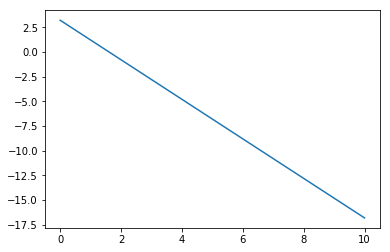

In [15]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

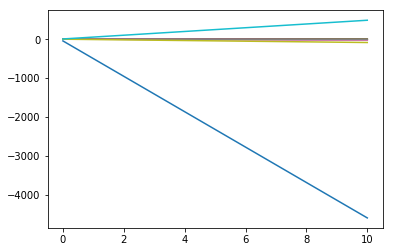

In [16]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

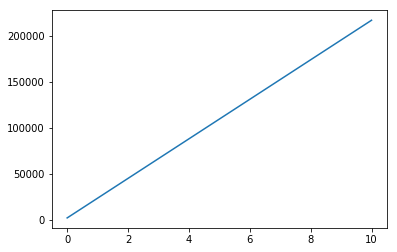

In [17]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments




### Weather Situation Vs Bike Rental
** _I am performing the experiment on weather condition such as temperature(what the actual temperature is and how the temperature feels like), humidity, spped of the wind and how the weather is(clear, cloudy, raining, mist) versus the number of bikes people rent according to the weather condition._ **

_For experiment purpose I have taken 70% of my data to be training data and the remaining 30% of my data is test data. The models are trained using the training data and are tested on test data to predict the output. Also, as a simple quantitative measure, I have reported RMSE(root mean square error result) that compares with the actual target value scale and tells how big or small is the error._ 

In [18]:
# Dividing the dataset into Training and Test data
data = pd.read_csv(r'Bike Sharing System.csv')
train = data.sample(frac = .70)
test = data.sample(frac = .30)

C:\Users\Nipun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


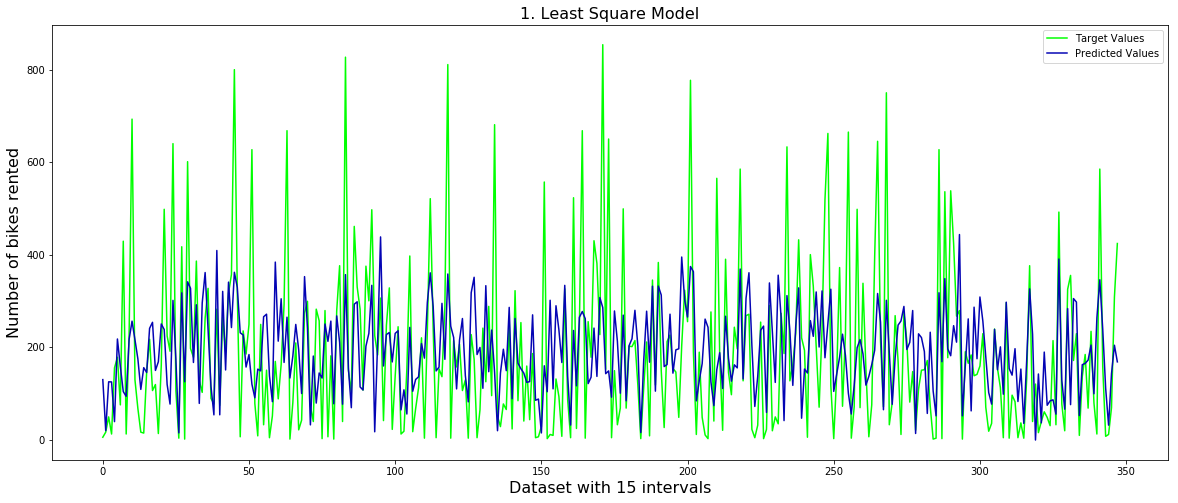

Root mean square error is: 14.215796634417474


In [19]:
# Training with Least Square Model
import math
import matplotlib.pyplot as plt1
%matplotlib inline

ls = LinearRegress()
ls.train(train[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values, train['cnt'].values.reshape(-1, 1))
T = ls.use(test[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values)

plt.figure(figsize=(20,8))
plt.title('1. Least Square Model', fontsize=16)
plt.plot(test['cnt'].values[0::15], label='Target Values', color='#00FF00')
plt.plot(T[0::15], label='Predicted Values', color = '#0404B4')
plt.xlabel('Dataset with 15 intervals', fontsize=16)
plt.ylabel('Number of bikes rented', fontsize=16)
plt.legend()
plt.show()


rmse = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('Root mean square error is: ' + str(math.sqrt(rmse)))

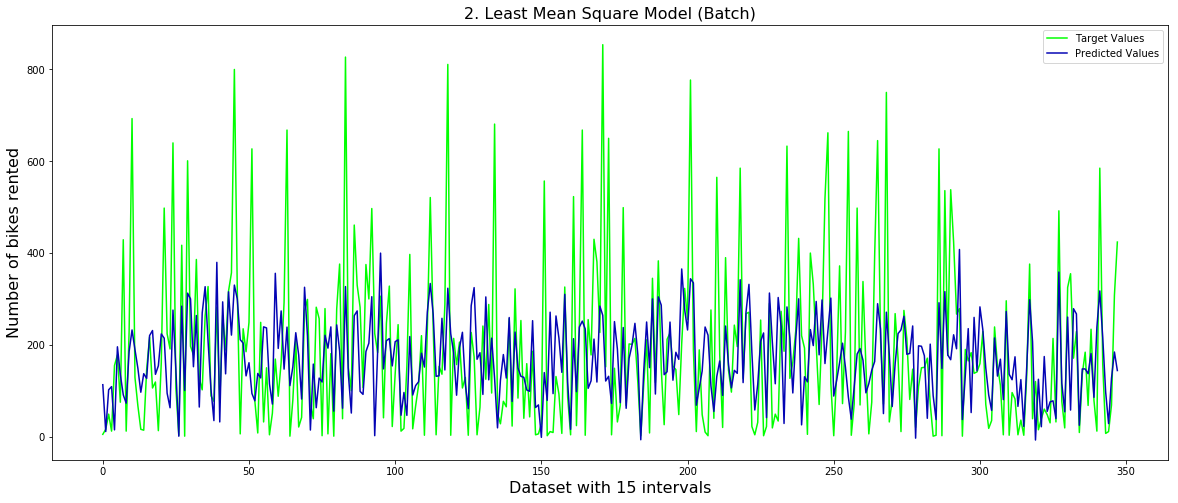

Root mean square error is: 14.1868224647647


In [20]:
# Training with Least Mean Square Model(Batch)
lms = LMS(0.01)
lms.train(train[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values, train['cnt'].values.reshape(-1, 1))

T = lms.use(test[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values)
plt.figure(figsize=(20,8))
plt.title('2. Least Mean Square Model (Batch)', fontsize=16)
plt.plot(test['cnt'].values[0::15], label='Target Values', color='#00FF00')
plt.plot(T[0::15], label='Predicted Values', color = '#0404B4')
plt.xlabel('Dataset with 15 intervals', fontsize=16)
plt.ylabel('Number of bikes rented', fontsize=16)
plt.legend()
plt.show()


rmse = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('Root mean square error is: ' + str(math.sqrt(rmse)))

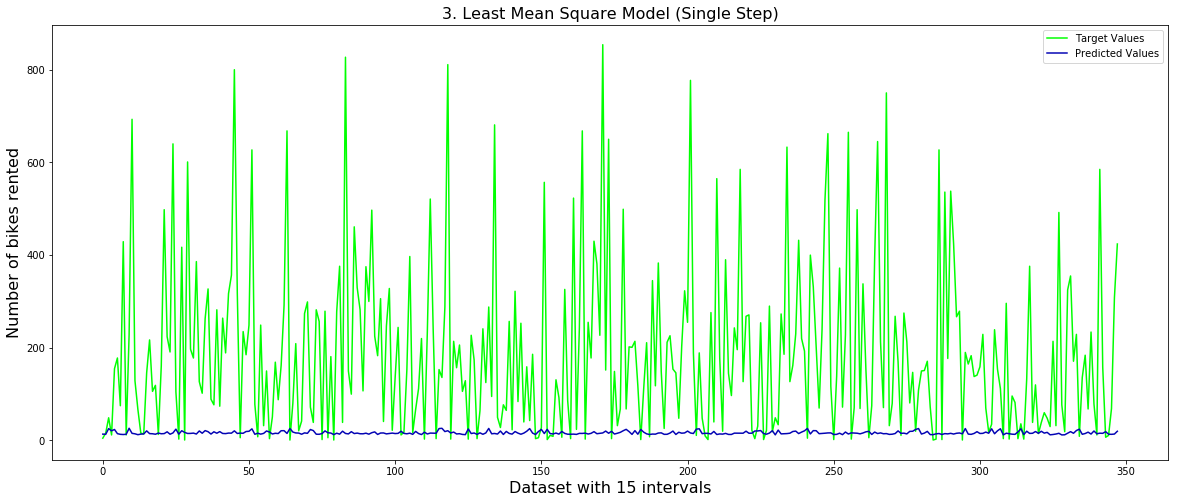

Root mean square error is: 15.779461100793059


In [21]:
# Training with Least Mean Square Model(Single Step)
lms = LMS(0.01)
lms.train_step(train[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values[0], train['cnt'].values.reshape(-1, 1)[0])

T = lms.use(test[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values)
plt.figure(figsize=(20,8))
plt.title('3. Least Mean Square Model (Single Step)', fontsize=16)
plt.plot(test['cnt'].values[0::15], label='Target Values', color='#00FF00')
plt.plot(T[0::15], label='Predicted Values', color = '#0404B4')
plt.xlabel('Dataset with 15 intervals', fontsize=16)
plt.ylabel('Number of bikes rented', fontsize=16)
plt.legend()
plt.show()

rmse = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('Root mean square error is: ' + str(math.sqrt(rmse)))

### Analysis of algorithms
** _When we compare the above plots, we can say that the Least Square model is the most accurate model as the target value and the predicted value overlap each other the most. Least Mean Square Model(Single Step) has the highest root mean square error because it only gives the mean results and since the model is trained with very less training set the weights do not align properly. Hence, we can say that weather situations does have an impact on the number of bikes rented._**